In [30]:
from optimization import *
from oracles import *
from plot_trajectory_2d import *
from utils import *
from tqdm import tqdm
import warnings

# Игнорируем предупреждения
warnings.filterwarnings("ignore")

from sklearn import datasets

# Устанавливаем фиксированное начальное значение для генератора случайных чисел
np.random.seed(42)

In [31]:
from sklearn.datasets import load_svmlight_file

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from sklearn import datasets

In [34]:
import os

## Эксперимент №1

In [5]:
# Настройки эксперимента
seeds = np.random.randint(1, 3000, 5)  # Генерируем случайные начальные числа
n_dim = [10, 100, 1000]  # Размерности пространства
colors = ['r', 'g', 'b']  # Цвета для графиков
labels = ['n = 10', 'n = 100', 'n = 1000']  # Метки для легенды
options = list(zip(n_dim, colors, labels))  # Собираем все параметры в список

In [6]:
# Параметры числа обусловленности
cond_numbers = np.arange(1, 501, 100)

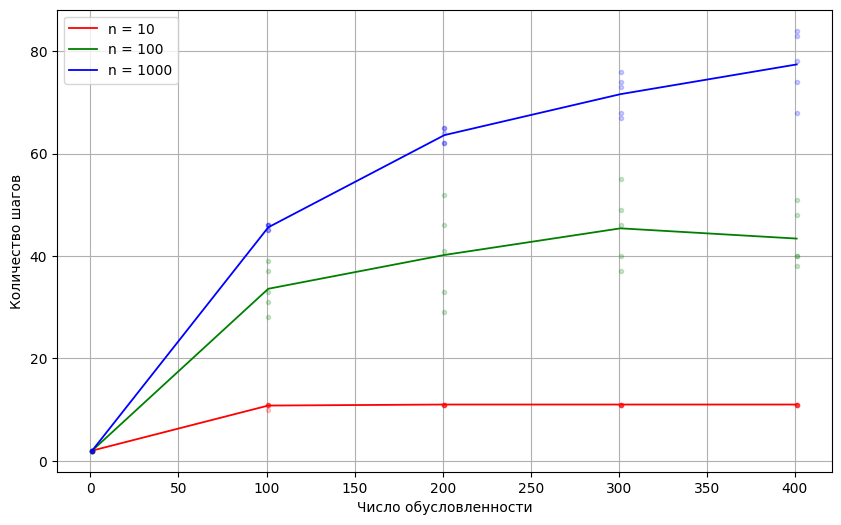

In [7]:
# Настройки графика
fig = plt.figure(figsize=(10, 6))
plt.xlabel('Число обусловленности')
plt.ylabel('Количество шагов')
plt.grid(linestyle='-')

# Основной цикл по размерностям
for n, color, label in options:
    y = np.zeros(len(cond_numbers))  # Инициализация массива для накопления результатов
    for seed in seeds:
        np.random.seed(seed)  # Устанавливаем начальное значение для каждого сеанса
        y_curr = []
        for c in cond_numbers:
            # Генерируем диагональную матрицу
            diag = np.random.uniform(1, c, size=n)
            diag[0] = 1
            diag[-1] = c
            A, b = scipy.sparse.diags(diag, 0), np.random.rand(n)
            _, ms, history = conjugate_gradients(lambda x: A @ x, b, np.zeros(n), trace=True)
            y_curr.append(len(history['time']))  # Добавляем количество шагов к текущему результату

        y += np.array(y_curr)  # Накопление результатов
        plt.plot(cond_numbers, y_curr, color + '.', alpha=0.2)  # График для текущего сеанса

    # Усредняем результаты и добавляем на график
    plt.plot(cond_numbers, y / (1. * len(seeds)), color, linewidth=1.3, label=label)

# Добавляем легенду и отображаем график
plt.legend(loc='best')
plt.show()  # Отображаем график

## Эксперимент №2

In [78]:
def create_plot(xlabel, results):
    # Создаём график с заданными подписями осей
    fig = plt.figure(figsize=(10, 6))
    plt.xlabel(xlabel)
    plt.ylabel('Логарифм относительной нормы градиента')

    for values, history, label in results:
        # Меняем ось x в зависимости от параметра xlabel
        x = np.arange(len(values)) if xlabel == 'Iterations' else history['time']
        plt.plot(x, values, label=label)

    plt.legend()
    plt.grid(linestyle='-')
    plt.show()  # Отображаем график

In [63]:
def load_data(file_path):
    # Загружаем данные из файла
    data = datasets.load_svmlight_file(file_path)
    return data[0], data[1]

In [64]:
history_lengths = [0, 5, 10, 50, 100, 500]
labels = ['Размер истории = 0', 'Размер истории = 5', 'Размер истории = 10', 'Размер истории = 50', 'Размер истории = 100', 'Размер истории = 500']

In [65]:
# Загрузка данных из датасета w8a
X, y = load_data('D:/HSE_ITMO_optimization_methods_course/LAB_1/w8a.txt')

# загрузка данных из датасета gisette_scale
A, b = load_svmlight_file('D:/HSE_ITMO_optimization_methods_course/LAB_1/gisette_scale.txt')

# Уменьшение размера
if A.shape[0] > 1000:  # этот метод был использован для построения графика gisette
    A = A[:1000, :]
    b = b[:1000]

In [79]:
def exp_2(x, y):
    # Параметр регуляризации
    regcoef = 1.0 / x.shape[0]
    x_0 = np.zeros(x.shape[1])  # Начальное значение
    oracle = create_log_reg_oracle(x, y, regcoef)  # Создание оракула логистической регрессии
    results = []

    # Основной цикл по размерам памяти
    for memory_size, label in zip(history_lengths, labels):
        _, msg, history = lbfgs(oracle, x_0, memory_size=memory_size, trace=True)  # Запуск метода L-BFGS
        y = np.square(np.array(history['grad_norm'], copy=True))  # Нормы градиентов
        y = np.log(y / y[0])  # Логарифмируем относительные значения
        results.append((y, history, label))  # Сохраняем результаты
        print(f'Размер истории: {memory_size}, {msg}, Итерации: {len(y)}, Время: {history["time"][-1]}')

    # Построение графиков
    create_plot('Iterations', results)  # График с осью итераций
    create_plot('Time', results)        # График с осью времени

Размер истории: 0, success, Итерации: 27, Время: 1.032865
Размер истории: 5, success, Итерации: 9, Время: 0.23213
Размер истории: 10, success, Итерации: 9, Время: 0.148614
Размер истории: 50, success, Итерации: 9, Время: 0.147475
Размер истории: 100, success, Итерации: 9, Время: 0.136741
Размер истории: 500, success, Итерации: 9, Время: 0.143478


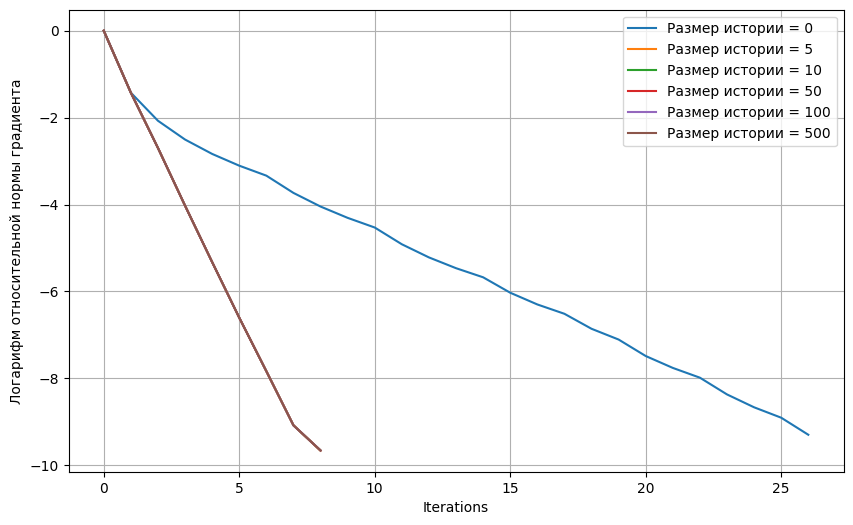

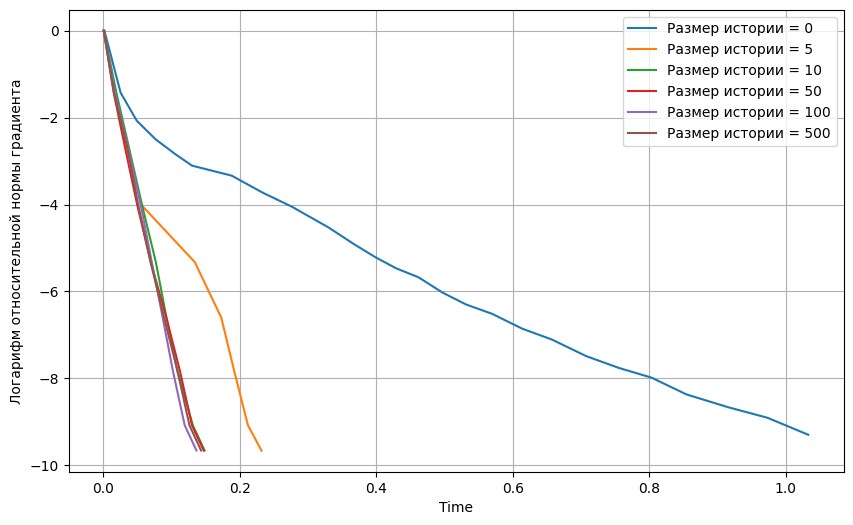

In [80]:
exp_2(X, y)  # для w8a

Размер истории: 0, success, Итерации: 240, Время: 22.308534
Размер истории: 5, success, Итерации: 22, Время: 1.654134
Размер истории: 10, success, Итерации: 22, Время: 1.748008
Размер истории: 50, success, Итерации: 21, Время: 1.605068
Размер истории: 100, success, Итерации: 21, Время: 1.622715
Размер истории: 500, success, Итерации: 21, Время: 1.643041


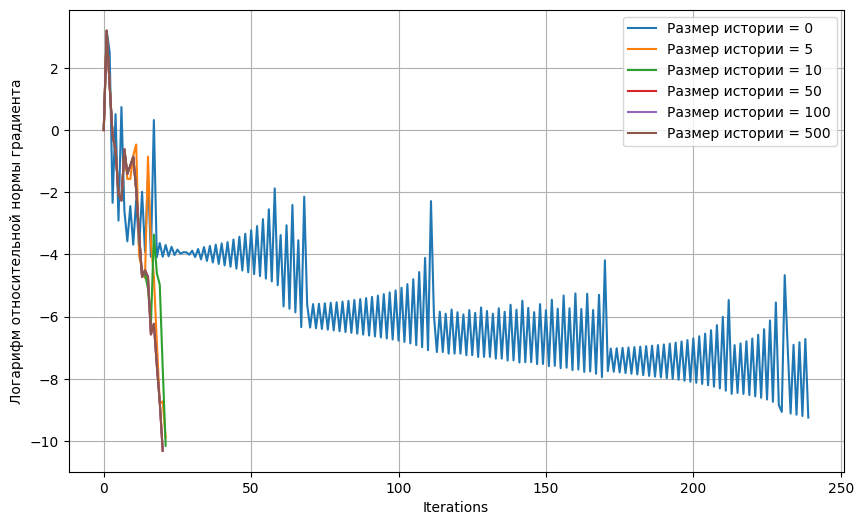

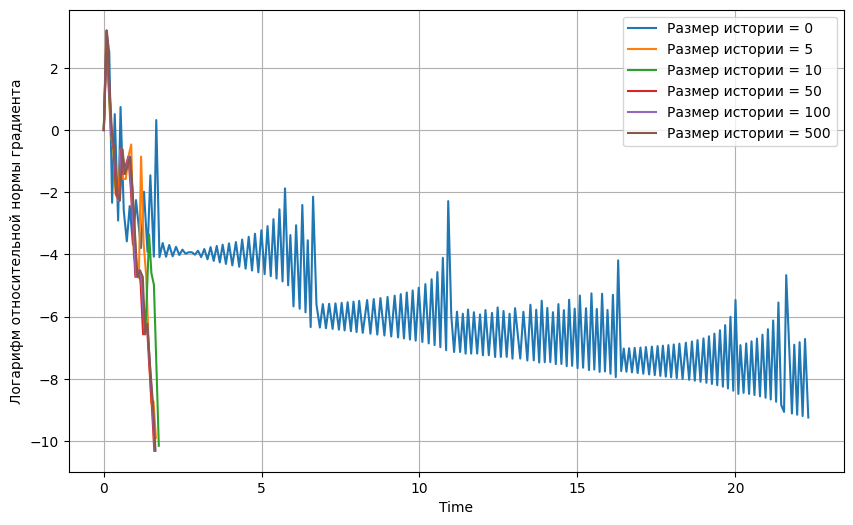

In [81]:
exp_2(A, b)  # для gisette_scale

## Эксперимент №3

In [87]:
def exp_3(file_path):
    
    def read_data(file_name):
        # Загружаем данные из файла
        data = datasets.load_svmlight_file(file_name)
        return data[0], data[1]
    
    def plot(history_GD, history_HFN, history_LBFGS, ylabel, xlabel, dataset_name):
        
        def compute_y(y, flag):
            if flag == 'func':
                return y
            y = np.square(np.array(y, copy=True))
            return np.log(y / y[0])
        
        def compute_t(history, flag):
            if flag == 'iterations':
                return np.arange(len(history['time']))
            return history['time']
        
        # Вычисление значений для осей y и x для каждого метода
        y_gd, t_gd = compute_y(history_GD[ylabel], ylabel), compute_t(history_GD, xlabel)
        y_hfn, t_hfn = compute_y(history_HFN[ylabel], ylabel), compute_t(history_HFN, xlabel)
        y_lbfgs, t_lbfgs = compute_y(history_LBFGS[ylabel], ylabel), compute_t(history_LBFGS, xlabel)

        # Построение графика
        fig = plt.figure()
        plt.xlabel('Итерации' if xlabel == 'iterations' else 'Время')
        ylabel_text = 'Значение функции' if ylabel == 'func' else 'Логарифм нормы градиента'
        plt.ylabel(ylabel_text)
        plt.plot(t_gd, y_gd, label='Градиентный спуск')  # Лейбл метода
        plt.plot(t_hfn, y_hfn, label='Ньютонов метод с Гессианом')  # Лейбл метода
        plt.plot(t_lbfgs, y_lbfgs, label='Метод L-BFGS')  # Лейбл метода
        plt.legend()
        plt.grid(linestyle='-')
        plt.show()  # Отображаем график
    
    # Получаем имя набора данных без расширения
    dataset_name = os.path.basename(file_path)[:-4]
    print(f'DATASET: {dataset_name}\n')
    
    # Чтение данных
    X, y = read_data(file_path)
    m, n = X.shape
    regcoef = 1.0 / m
    oracle = create_log_reg_oracle(X, y, regcoef)  # Создаём оракул логистической регрессии
    history_HFN, history_LBFGS, history_GD = None, None, None
    
    # Метод градиентного спуска
    print('Запуск градиентного спуска')
    _, res_GD, history_GD = gradient_descent(oracle, np.zeros(n), trace=True)
    print(f'Градиентный спуск завершён, результат: {res_GD}, итерации: {len(history_GD["time"])}, время: {history_GD["time"][-1]}, {round(history_GD["time"][-1] / len(history_GD["time"]), 3)}\n')
    
    # Метод Гессиан свободного Ньютона
    print('Запуск метода Гессиан свободного Ньютона')
    _, res_HFN, history_HFN = hessian_free_newton(oracle, np.zeros(n), trace=True)
    print(f'Метод Гессиан свободного Ньютона завершён, результат: {res_HFN}, итерации: {len(history_HFN["time"])}, время: {history_HFN["time"][-1]}, {round(history_HFN["time"][-1] / len(history_HFN["time"]), 3)}\n')
    
    # Метод L-BFGS
    print('Запуск метода L-BFGS')
    _, res_LBFGS, history_LBFGS = lbfgs(oracle, np.zeros(n), trace=True)
    print(f'Метод L-BFGS завершён, результат: {res_LBFGS}, итерации: {len(history_LBFGS["time"])}, время: {history_LBFGS["time"][-1]}, {round(history_LBFGS["time"][-1] / len(history_LBFGS["time"]), 3)}\n')
    
    # Построение графиков
    plot(history_GD, history_HFN, history_LBFGS, 'func', 'iterations', dataset_name)  # График 1: значение функции от итераций
    plot(history_GD, history_HFN, history_LBFGS, 'func', 'time', dataset_name)       # График 2: значение функции от времени
    plot(history_GD, history_HFN, history_LBFGS, 'grad_norm', 'time', dataset_name)  # График 3: логарифм нормы градиента от времени


DATASET: w8a

Запуск градиентного спуска
Градиентный спуск завершён, результат: success, итерации: 36, время: 1.494898, 0.042

Запуск метода Гессиан свободного Ньютона
Метод Гессиан свободного Ньютона завершён, результат: success, итерации: 7, время: 0.207183, 0.03

Запуск метода L-BFGS
Метод L-BFGS завершён, результат: success, итерации: 9, время: 0.150645, 0.017



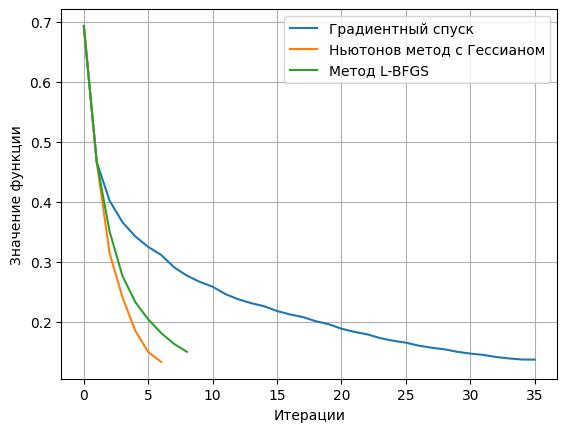

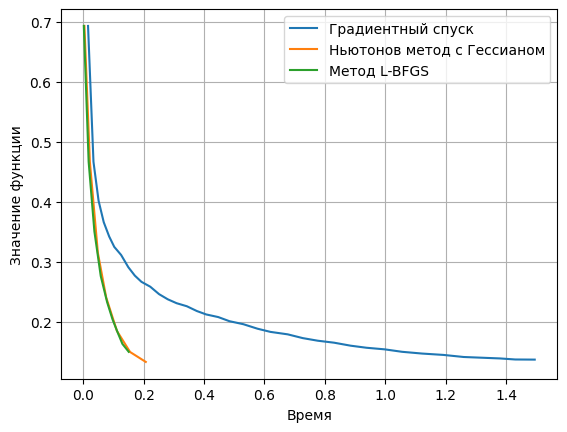

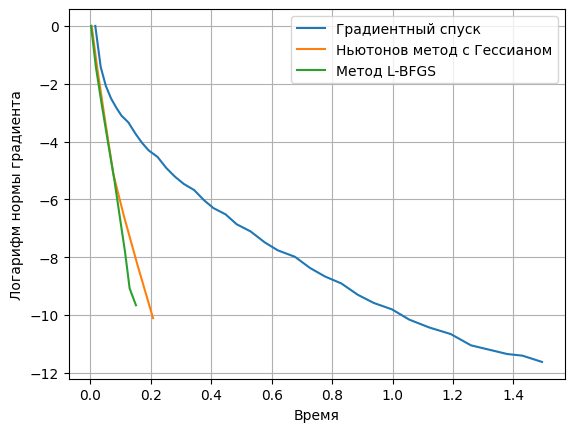

In [88]:
exp_3('D:/HSE_ITMO_optimization_methods_course/LAB_1/w8a.txt')

DATASET: real-sim

Запуск градиентного спуска
Градиентный спуск завершён, результат: success, итерации: 104, время: 30.989751, 0.298

Запуск метода Гессиан свободного Ньютона
Метод Гессиан свободного Ньютона завершён, результат: success, итерации: 5, время: 0.84617, 0.169

Запуск метода L-BFGS
Метод L-BFGS завершён, результат: success, итерации: 10, время: 0.7855, 0.079



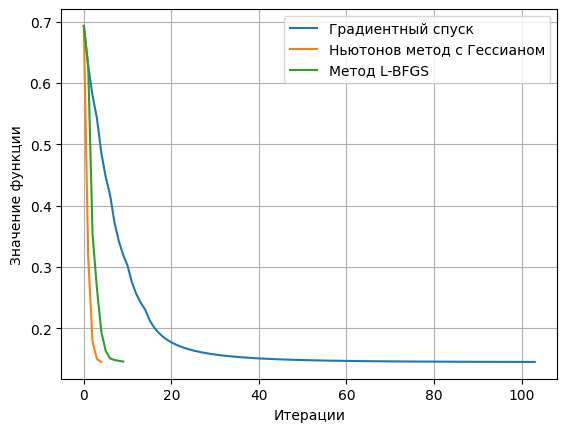

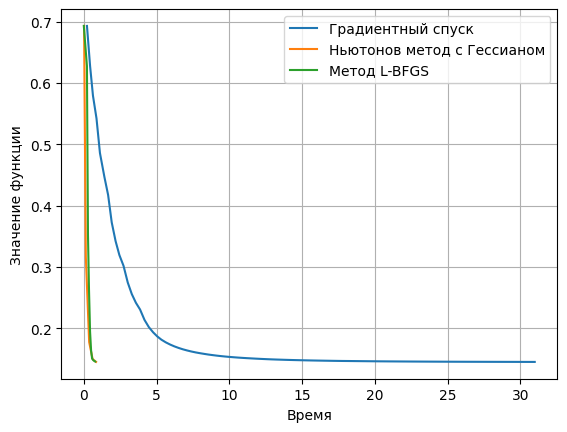

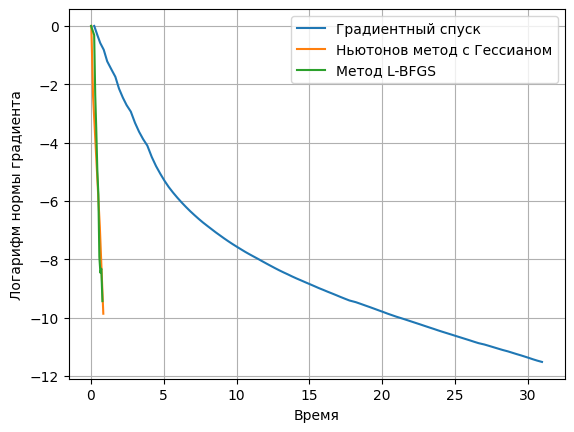

In [89]:
exp_3('D:/HSE_ITMO_optimization_methods_course/LAB_1/real-sim.txt')

In [14]:
import os
import bz2

In [15]:
def decompress_file(filepath):
    # Путь для распакованного файла .txt
    newfilepath = filepath.replace('.bz2', '.txt')

    # Декомпрессия файла
    with open(newfilepath, 'wb') as new_file, open(filepath, 'rb') as file:
        decompressor = bz2.BZ2Decompressor()
        for data in iter(lambda: file.read(100 * 1024), b''):
           new_file.write(decompressor.decompress(data))

In [16]:
decompress_file('D:/HSE_ITMO_optimization_methods_course/LAB_2/news20.binary.bz2')

In [17]:
decompress_file('D:/HSE_ITMO_optimization_methods_course/LAB_2/rcv1_train.binary.bz2')

DATASET: news20.binary

Запуск градиентного спуска
Градиентный спуск завершён, результат: success, итерации: 153, время: 208.743946, 1.364

Запуск метода Гессиан свободного Ньютона
Метод Гессиан свободного Ньютона завершён, результат: success, итерации: 4, время: 3.933346, 0.983

Запуск метода L-BFGS
Метод L-BFGS завершён, результат: success, итерации: 14, время: 7.421368, 0.53



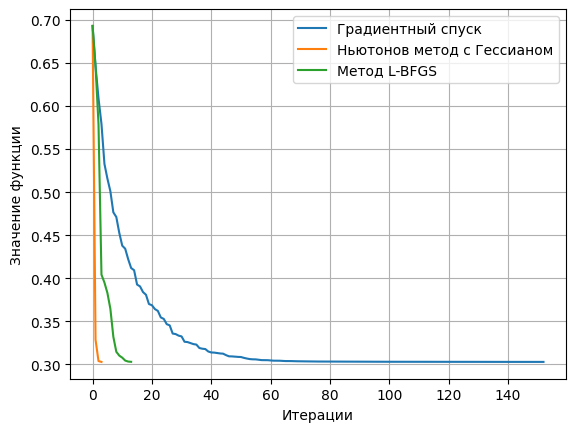

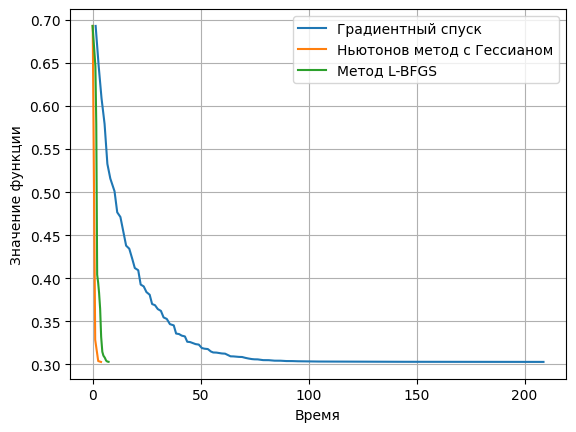

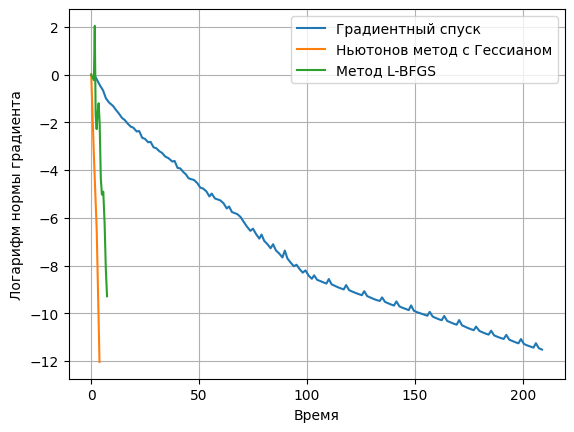

In [90]:
exp_3('D:/HSE_ITMO_optimization_methods_course/LAB_2/news20.binary.txt')

DATASET: rcv1_train.binary

Запуск градиентного спуска
Градиентный спуск завершён, результат: success, итерации: 52, время: 6.16369, 0.119

Запуск метода Гессиан свободного Ньютона
Метод Гессиан свободного Ньютона завершён, результат: success, итерации: 5, время: 0.345567, 0.069

Запуск метода L-BFGS
Метод L-BFGS завершён, результат: success, итерации: 11, время: 0.367761, 0.033



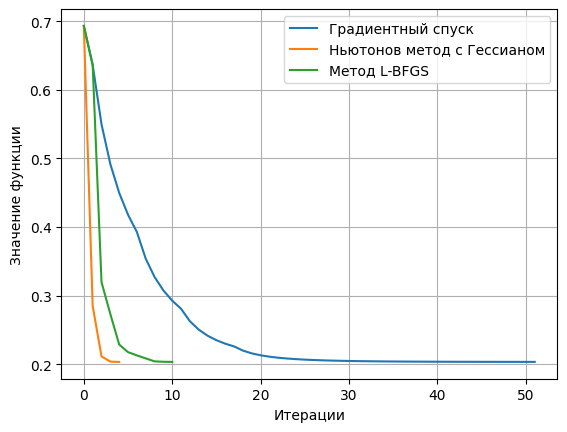

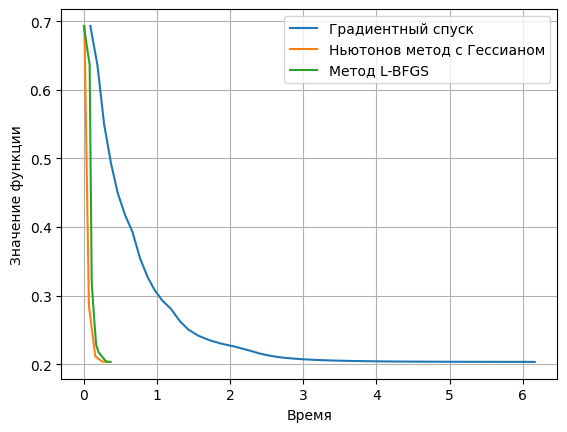

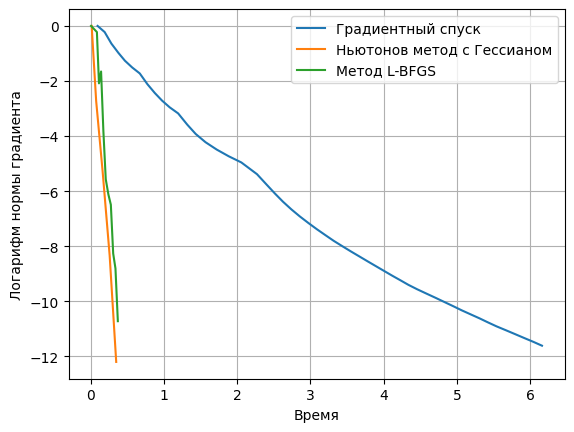

In [91]:
exp_3('D:/HSE_ITMO_optimization_methods_course/LAB_2/rcv1_train.binary.txt')

DATASET: gisette_scale

Запуск градиентного спуска
Градиентный спуск завершён, результат: success, итерации: 1832, время: 970.088765, 0.53

Запуск метода Гессиан свободного Ньютона
Метод Гессиан свободного Ньютона завершён, результат: success, итерации: 7, время: 8.879354, 1.268

Запуск метода L-BFGS
Метод L-BFGS завершён, результат: success, итерации: 33, время: 13.69326, 0.415



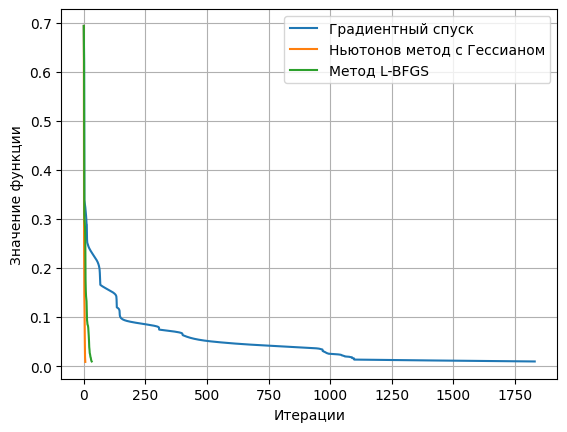

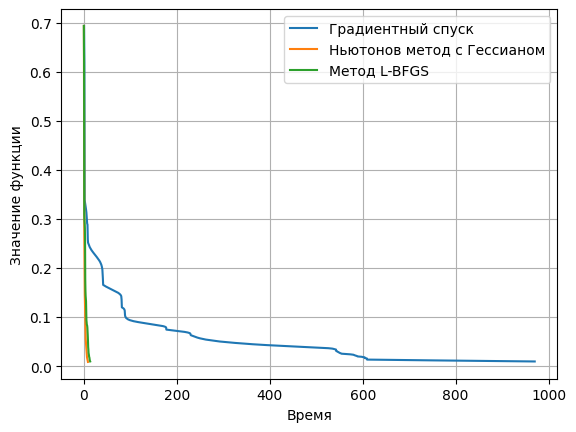

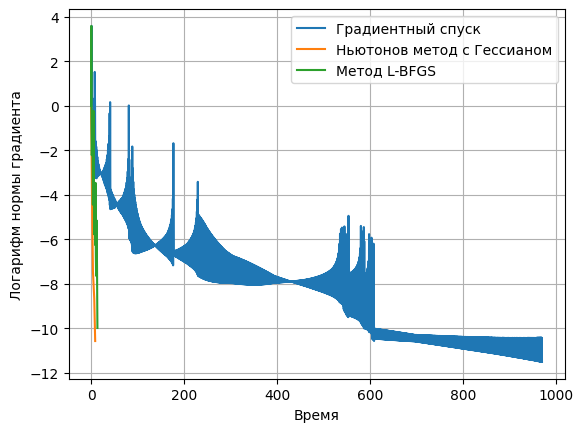

In [92]:
exp_3('D:/HSE_ITMO_optimization_methods_course/LAB_1/gisette_scale.txt')